#### Imports
We import tensorflow, pandas, numpy and our dataset

In [13]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

dataset = pd.read_excel("./dataset.xlsx")

# np.random.shuffle(dataset.values)

X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,-1].values

# split the data into training and validation
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size = 10, shuffle = False)

#### Defining a model
Here we will create a neural network model which will take the input of 6 features, go through two hidden layers, and output whether the result is a loss or a win.

In [14]:
# The model
model = keras.Sequential([
        keras.layers.Dense(96, input_shape = (6,), activation = "relu"),
        keras.layers.Dense(48, activation = "relu"),
        keras.layers.Dense(2, activation = "softmax")
    ]
)

#### Fitting the model

In [15]:
def train():
    model.compile(
        optimizer = "adam",
        loss = keras.losses.SparseCategoricalCrossentropy(from_logits = False),
        metrics = ["accuracy"]
    )
    model.fit(train_X, train_Y, batch_size = 10, epochs=20)

def predict_outcomes(test_X):
    predictions = np.around(model.predict(test_X), decimals = 2)
    prediction_list = []
    for prediction in predictions:
        prediction_list.append(0 if prediction[0] > 0.5 else 1)
    return np.array(prediction_list)
    
def evaluate(test_X, test_Y):
    model.evaluate(test_X, test_Y)
    return

train()

Epoch 1/20
4/4 [==============================] - 0s 2ms/step - loss: 39.7456 - accuracy: 0.4250
Epoch 2/20
4/4 [==============================] - 0s 1ms/step - loss: 8.6500 - accuracy: 0.6750
Epoch 3/20
4/4 [==============================] - 0s 1ms/step - loss: 12.0211 - accuracy: 0.7250
Epoch 4/20
4/4 [==============================] - 0s 2ms/step - loss: 7.0741 - accuracy: 0.7250
Epoch 5/20
4/4 [==============================] - 0s 1ms/step - loss: 3.2598 - accuracy: 0.7000
Epoch 6/20
4/4 [==============================] - 0s 2ms/step - loss: 2.2219 - accuracy: 0.7250
Epoch 7/20
4/4 [==============================] - 0s 2ms/step - loss: 2.0742 - accuracy: 0.7750
Epoch 8/20
4/4 [==============================] - 0s 2ms/step - loss: 1.9709 - accuracy: 0.8250
Epoch 9/20
4/4 [==============================] - 0s 2ms/step - loss: 2.0002 - accuracy: 0.7750
Epoch 10/20
4/4 [==============================] - 0s 1ms/step - loss: 2.2291 - accuracy: 0.8000
Epoch 11/20
4/4 [====================

In [16]:
print(predict_outcomes(test_X))
print(test_Y)
evaluate(test_X, test_Y)

1/1 [==============================] - 0s 48ms/step
[0 0 0 0 0 0 1 1 1 0]
[0 1 0 0 0 0 0 1 1 1]
1/1 [==============================] - 0s 97ms/step - loss: 5.7444 - accuracy: 0.7000


#### Data visualization
Here we will draw a chart that compares the actual results to the predicted results by our neural network model.

1/1 [==============================] - 0s 18ms/step


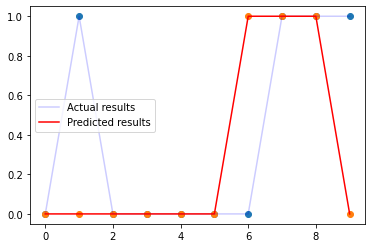

In [17]:
from matplotlib import pyplot as plt

plt.scatter(np.arange(stop = len(test_Y)), test_Y)
plt.plot(np.arange(stop = len(test_Y)), test_Y, color = "blue", alpha = 0.2, label = "Actual results")

predicted_outcomes = predict_outcomes(test_X)

plt.scatter(np.arange(stop = len(predicted_outcomes)), predicted_outcomes)
plt.plot(np.arange(stop = len(predicted_outcomes)), predicted_outcomes, color = "red", label = "Predicted results")
plt.legend(loc = "upper left")